##safety helmet detection code

In [ ]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
    while "models" in pathlib.Path.cwd().parts:
        os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3504, done.
remote: Counting objects: 100% (3504/3504), done.
remote: Compressing objects: 100% (2921/2921), done.
remote: Total 3504 (delta 917), reused 1462 (delta 530), pack-reused 0
Receiving objects: 100% (3504/3504), 46.98 MiB | 21.95 MiB/s, done.
Resolving deltas: 100% (917/917), done.


In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696507 sha256=52c8baf84f842e456a889da7e51c00b2833a94c905f5a1f0e08472c41d01f5af
  Stored in directory: /tmp/pip-ephem-wheel-cache-m0_8rfbo/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=b3ea0cb0742cc746cbfdb577f3cc786e4d35898465bfe7e02853e64b2616da9f
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=44010 sha256=6de8b5cf436600b5e918b43df504c7fa306c90c6ad38e91244fda4fb8bd087dc
  Stored in directory: /root/.cache/pip/wheels/d6/e5/b1/6b151d9b535ee50aaa6ab27d145a0104b6df02e5636f0376da
  Created wheel for docopt: filename=docopt-

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


In [ ]:
import tensorflow as tf
import time
import sys
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import numpy as np
import random
import pandas as pd
import argparse
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import warnings
from google.colab.patches import cv2_imshow
warnings.filterwarnings('ignore')   
%matplotlib inline

In [ ]:
PATH_TO_SAVED_MODEL="path+saved_model" #path of saved model
print('Loading model...', end='')

detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Loading model...Done!


In [ ]:

label_path = "path+labelmap.pbtxt" #path of labelmap.pbtxt file
category_index=label_map_util.create_category_index_from_labelmap(label_path, use_display_name=True)
category_index

{1: {'id': 1, 'name': 'Hardhat'}, 2: {'id': 2, 'name': 'head'}}

In [ ]:
def load_image_into_numpy_array(path):
   
    return np.array(Image.open(path))

def remove_person_class(detections):


    indices_of_person = [i for i, value in enumerate(detections['detection_classes']) if value == 3]
    for key in detections.keys():
        if key == 'num_detections':
            detections[key] = detections[key] - len(indices_of_person)
        else:
            detections[key] = np.delete(detections[key], indices_of_person, axis = 0)

    return detections

def inference(imgs):
    rows = len(imgs)//3
    cols = 3
    figsize = (20, 6*rows)
    fig, axes = plt.subplots(rows, cols, figsize = figsize)
    detected_imgs = []

    for i, (image_path, ax) in enumerate(zip(imgs, axes.ravel())):
        image_np = load_image_into_numpy_array(image_path)
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
        detections = detect_fn(input_tensor)
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                    for key, value in detections.items()}
        detections['num_detections'] = num_detections

      
        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
        detections = remove_person_class(detections)

        label_id_offset = 0
        image_np_with_detections = image_np.copy()


        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.30,
                agnostic_mode=False)
        
        detected_imgs.append(image_np_with_detections)

    for im, ax in zip(detected_imgs, axes.ravel()):
        ax.imshow(im)

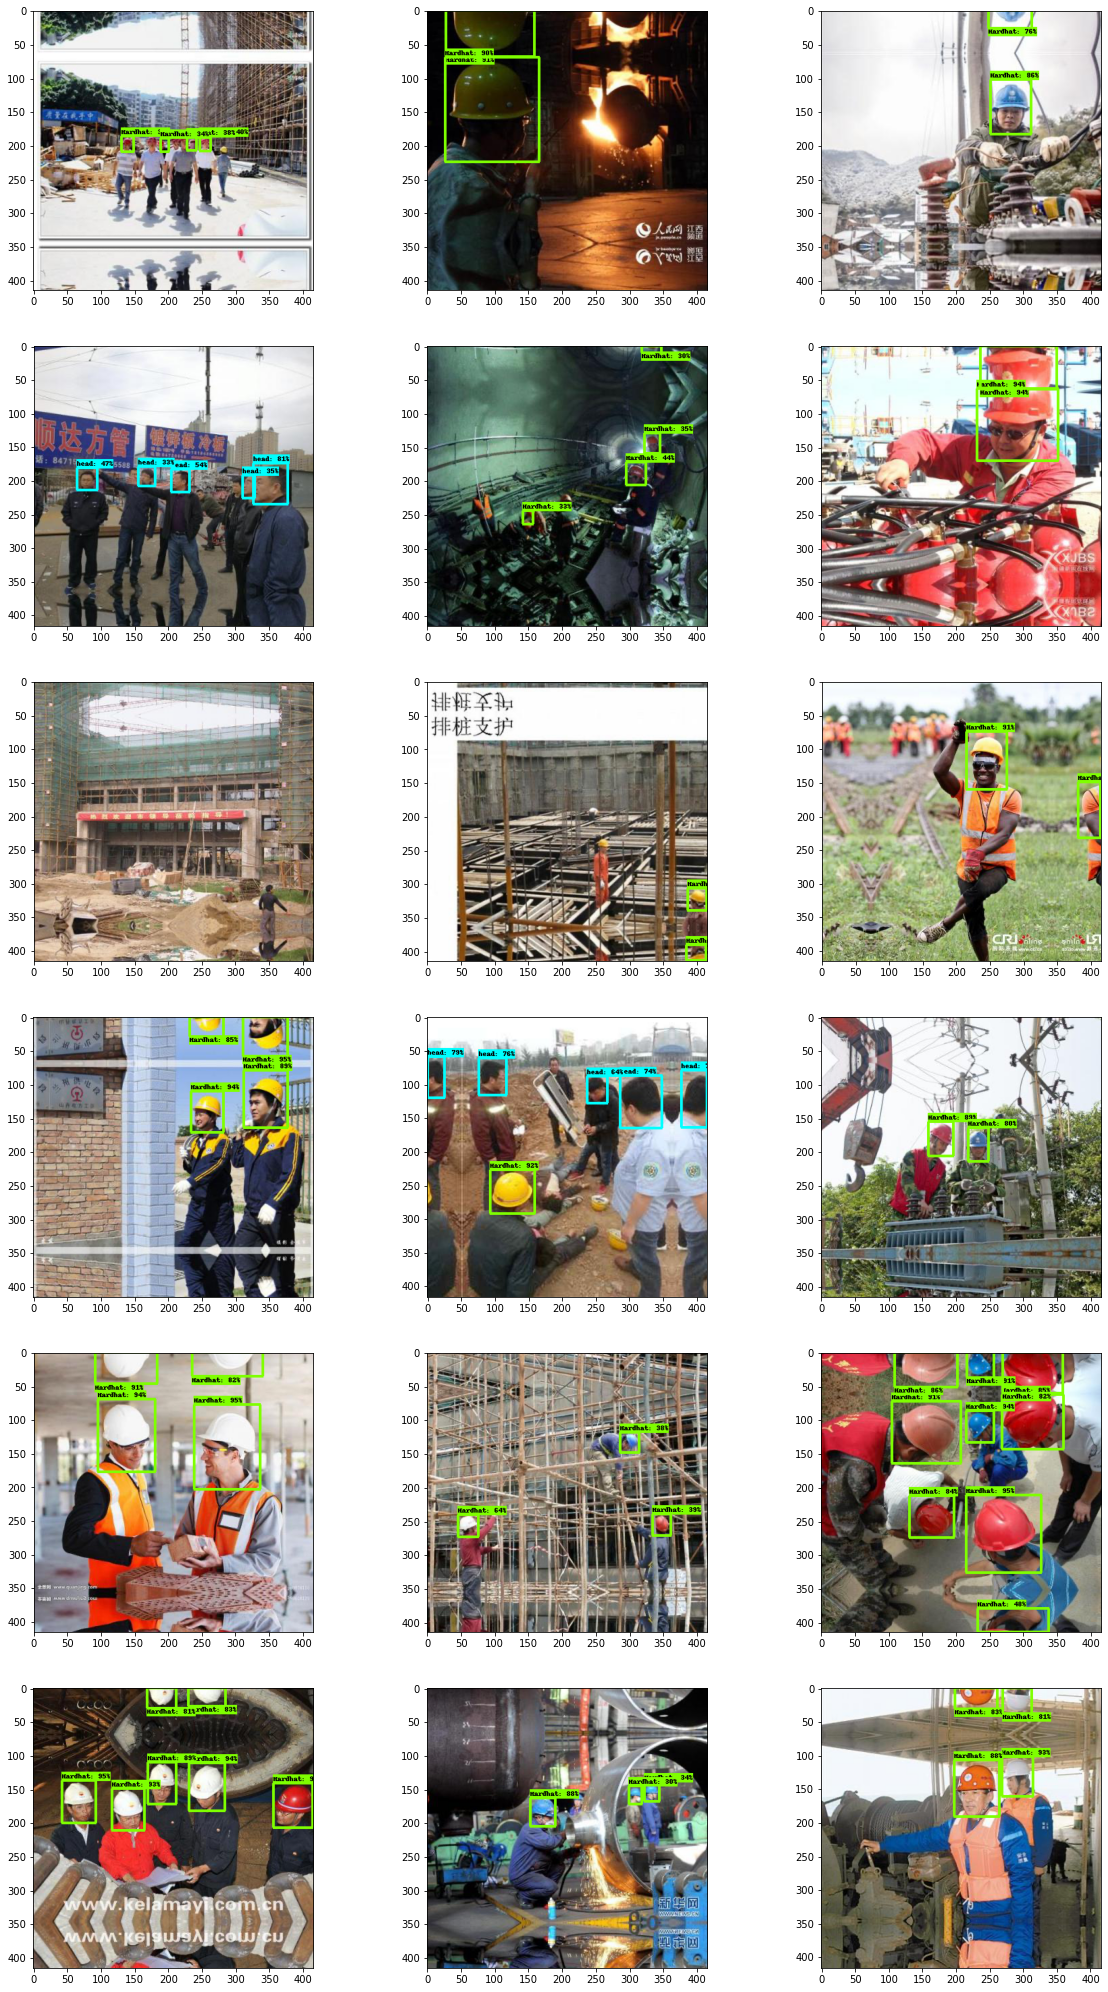

In [ ]:
image_indices = random.sample(range(1, 50), 10) # here (1, 50) is range & 10 is any random images from 50 images
imgs=[f'image-path{image_indices[0]}.png', # image-path 
     f'image-path{image_indices[1]}.png',  # image-path 
     f'image-path{image_indices[2]}.png',  # image-path  
     f'image-path{image_indices[3]}.png',  # image-path 
     f'image-path{image_indices[4]}.png',  # image-path 
     f'image-path{image_indices[5]}.png',  # image-path 
     f'image-path{image_indices[6]}.png',  # image-path 
     f'image-path{image_indices[7]}.png',  # image-path 
     f'image-path{image_indices[8]}.png',  # image-path 
     f'image-path{image_indices[9]}.png',  # image-path 
     f'image-path{image_indices[10]}.png'  # image-path 
       ]
    
inference(imgs)

#### Inference on Video

In [ ]:
def inference_video(FILE_INPUT, FILE_OUTPUT):

    cap = cv2.VideoCapture(FILE_INPUT)


    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))


    out = cv2.VideoWriter(FILE_OUTPUT, cv2.VideoWriter_fourcc(*'MP4V'), 15, (frame_width, frame_height))

    sys.path.append("..")

    while(cap.isOpened()):
       
        ret, frame = cap.read()

        if ret == True:

            input_tensor = tf.convert_to_tensor(np.expand_dims(frame, 0), dtype=tf.uint8)
            detections = detect_fn(input_tensor)
            num_detections = int(detections.pop('num_detections'))
            detections = {key: value[0, :num_detections].numpy()
                        for key, value in detections.items()}
            detections['num_detections'] = num_detections

            
            detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
            detections = remove_person_class(detections)
            
            label_id_offset = 0
            image_np_with_detections = frame.copy()

            viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                (detections['detection_classes'] + label_id_offset).astype(int),
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=200,
                min_score_thresh=.30,
                agnostic_mode=False)

            
            out.write(image_np_with_detections)

        else:
            break

        
    cap.release()
    out.release()
    print('Video created!')

In [ ]:
FILE_OUTPUT = 'path+output_video.mp4'  # output video path

if os.path.isfile(FILE_OUTPUT):
    os.remove(FILE_OUTPUT)

FILE_INPUT = 'path+input_video.mp4' # input video path
inference_video(FILE_INPUT, FILE_OUTPUT)

Video created!
